### Question 1: 1-way ANOVA.
Mechanical parts such as computer disk drives, light bulbs, and glue bonds eventually fail.  One experimental method for reliability is called an accelerated life test.
Parts under stress will usually fail sooner than parts that are unstressed. By modeling the lifetimes of parts under various stresses, we can estimate (extrapolate
to) the lifetime of parts that are unstressed. That way we get an estimate of the unstressed lifetime without having to wait the complete unstressed lifetime.

Nelson (1990) gave an example where the goal was to estimate the lifetime (in hours) of an encapsulating resin for gold-aluminum bonds in integrated circuits operating at 120$^{o}C$. Since the lifetimes were expected to be
rather long, an accelerated test was used. 

Thirty-seven units were assigned
at random to one of five different temperature stresses, ranging from 175$^{o}C$ to
250$^{o}C$. The following table gives the $\log_{10}$ lifetimes in hours for the test units:


|Temperature |$\log_{10}$ times till failure |   
|--- | ------|
|175 | 2.04, 1.85, 1.91, 1.96, 2.00, 1.88, 1.92, 1.90 | 
|194 | 1.66, 1.66, 1.71, 1.61, 1.42, 1.55, 1.76, 1.66| 
|213 | 1.53, 1.35, 1.54, 1.27, 1.38, 1.26, 1.31, 1.38 | 
|231 | 1.15, 1.21, 1.22, 1.28, 1.17, 1.17, 1.16 |
|250 | 1.26, 1.02, 0.83, 1.09, 1.08, 1.06 |


(1) Visualize the data from the experiment using box-plot.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data_175=[2.04, 1.85, 1.91, 1.96, 2.00, 1.88, 1.92, 1.90]
data_194=[1.66, 1.66, 1.71, 1.61, 1.42, 1.55, 1.76, 1.66]
data_213=[1.53, 1.35, 1.54, 1.27, 1.38, 1.26, 1.31, 1.38]
data_231=[1.15, 1.21, 1.22, 1.28, 1.17, 1.17, 1.16]
data_250=[1.26, 1.02, 0.83, 1.09, 1.08, 1.06]
y=sum([data_175, data_194, data_213,data_231, data_250],[])
factor=sum([['175']*len(data_175), ['194']*len(data_194), ['213']*len(data_213),['231']*len(data_231), ['250']*len(data_250)],[])
df=pd.DataFrame({'resp':y, 'Trt':factor})

(2) Conduct 1-way ANOVA.  Do you reject the null hypothesis that all the treatment means are the same?

**Ans**:

In [3]:
## code here
import statsmodels.api as sm
from statsmodels.formula.api import ols
Model1=ols('resp ~ Trt', data=df).fit(alpha=0.01)
anova_table = sm.stats.anova_lm(Model1, typ=2)
anova_table


,sum_sq,df,F,PR(>F)
Trt,3.537632,4.0,96.362963,2.241949e-17
Residual,0.293692,32.0,NaN,NaN


The p-value is incredibly small, meaning we can reject the null hypothesis

(3) Verify if the three model assumptions are valid.

3 model assumptions:
- Each sample was drawn from a normally distributed population
- the variances of the populations that the samples come from are equal
- The observations in each group are independent of each other & the observations within groups were obtained by a random sample


**Ans**:

We use the Shapiro-Wilk's method to determine whether the data comes from a normally distributed population

In [4]:
import scipy.stats as stats
stats.shapiro(Model1.resid)

ShapiroResult(statistic=np.float64(0.9672661996442772), pvalue=np.float64(0.33926225670077687))

The p-value of the shapiro-wilk's method indicates the data does come from a normal distributed population

We conduct Bartlett's test to determine whether the sample data has equal variances.

In [ ]:
stats.bartlett(data_175, data_194, data_213, data_231, data_250) 

BartlettResult(statistic=np.float64(7.651819982275299), pvalue=np.float64(0.10519803317275436))

The P value is 0.1, which is higher than the typical alpha value to reject the null hypothesis, so we know the population has equal variances

We know from the question itself that the observations were independent of each other & that the observations were obtained through a random sample

### Question 2: 2-way ANOVA 

The following table shows the results of an experiment on sprouting barley.  The 30 lots of seeds are divided at random into ten groups of three lots each, with each group receiving a different treatment. The ten treatments
are the factorial combinations of amount of `water` used for sprouting (factor A) with two levels, and `age` of the seeds (factor B) with five levels. The response measured is the `number` of seeds sprouting.

         
|ml H2O ||Age of|  Seeds |(weeks)||
|--- |--- |--- |--- |--- |--- 
|    |1 | 3 |6 | 9| 12| 
|  4  |11,9,6 | 7,16,17 |9,19,35 | 13,35,28| 20,37,45| 
|  8  |8,3,3 | 1,7,3 |5,9,9 | 1,10,9| 11,15,25| 



(1) Use interaction plot to check if there is an interaction effect between `water` used and `age` of seeds.\
**Ans**:

<Axes: xlabel='age', ylabel='resp'>

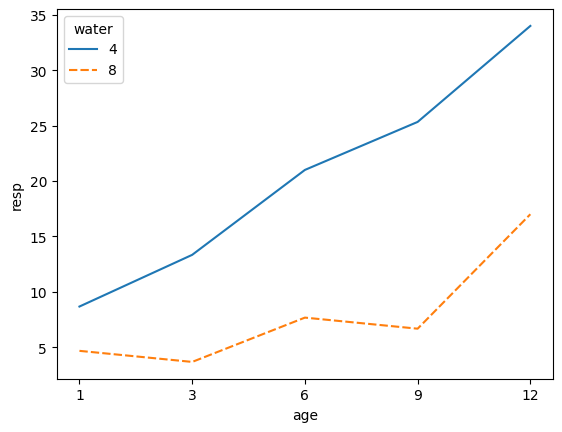

In [16]:
## code here
y=[11,9,6, 7,16,17, 9,19,35, 13,35,28, 20,37,45, 8,3,3, 1,7,3, 5,9,9,  1,10,9,  11,15,25]
water=sum([['4']*15,['8']*15],[])
age=sum([['1']*3,['3']*3,['6']*3,['9']*3,['12']*3]*2,[])
df=pd.DataFrame({'resp':y, 'water':water,'age':age} )

sns.lineplot(data=df, x="age", y="resp", hue="water", style="water", errorbar=None)


The line segments are not parallel, so there appears to be no interaction effect

(2) Conduct ANOVA for the experiment and draw your conclusions.\
**Ans**:

In [18]:
## code here
model = ols('resp ~ C(age) + C(water) + C(water):C(age)', data=df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(age),1321.133333,4.0,5.529297,0.003645
C(water),1178.133333,1.0,19.723214,0.000251
C(water):C(age),208.866667,4.0,0.874163,0.496726
Residual,1194.666667,20.0,NaN,NaN


The p-values of age and water indicate that they have a significant effect on the number of seeds sprouting. 

The high p-value of water:age indicates there is no relationship between these two values

(3) Suppose there is no interaction effect between `water` used and `age` of seeds, use Tukey’s method to conduct the post-hoc analysis among the five levels of `age` of the seeds and visualize the multiple comparisons at significance
level 0.05. Write down your conclusions (explain how many groups are formed).\
**Ans**:

In [22]:
## code here
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukeyresults1=pairwise_tukeyhsd(endog=df['resp'],
groups=df['age'],alpha=0.05)
print(tukeyresults1)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1     12  18.8333 0.0272   1.6026 36.0641   True
     1      3   1.8333 0.9978 -15.3974 19.0641  False
     1      6   7.6667 0.6896  -9.5641 24.8974  False
     1      9   9.3333 0.5166  -7.8974 26.5641  False
    12      3    -17.0 0.0544 -34.2308  0.2308  False
    12      6 -11.1667 0.3416 -28.3974  6.0641  False
    12      9     -9.5 0.4995 -26.7308  7.7308  False
     3      6   5.8333 0.8554 -11.3974 23.0641  False
     3      9      7.5 0.7064  -9.7308 24.7308  False
     6      9   1.6667 0.9985 -15.5641 18.8974  False
-----------------------------------------------------


the p-value when resp is 1 & when age is 12 indicate that there is a significant departure from the group mean at that point